In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 5)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


# SkinnyTrees Tuning

In [10]:
budget = 0.25
max_features = {
    'churn': 33,
    'texture': 40,
    'satimage': 36,
    'isolet': 617,
    'mice-protein': 77,
    'arcene': 10000,
    'gisette': 5000,
    'madelon': 500,
    'dorothea': 100000,
    'smk': 19993,
    'cll': 11340,
    'gli': 22283,
    'lung': 3312,
    'tox': 5748
}

In [11]:
data = 'churn'
annealing = [True]
criteria = 'auc'
tuning_seeds = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
version = 1

for anneal in annealing:
    print("======== Anneal:{}".format(anneal))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "/home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/{}/cross-entropy/{}.{}/study".format(data, version, tuning_seed)
        if anneal:
            path = path+"-anneal"
#         path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path+"-seed8.csv")
        except:
            print("Missing:", path+"-seed8.csv")
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    print("Number of total trials:", df.shape[0])
    print("Max number of features:", max_features[data])
    df_study = df.copy()
    df = df[(df["user_attrs_feature_sparsity"]<=budget*max_features[data])&(df["user_attrs_feature_sparsity"]>0)]
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df = df.sort_values(by=["user_attrs_"+criteria+"_valid"], ascending=False)
    best_value = df["user_attrs_"+criteria+"_valid"].values[0]
    df_opt = df[df["user_attrs_"+criteria+"_valid"]==best_value]

    df_opt = df_opt.sort_values(by='user_attrs_feature_sparsity')
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
        print("test_auc:", df_opt.user_attrs_auc_test.mean())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
    print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
    print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
#     print("Approx sparsity:", df_opt.user_attrs_approximate_feature_sparsity.values)
#     print("Mean approx sparsity:", df_opt.user_attrs_feature_sparsity.mean())
#     print("Batch-sizes:", df_opt.params_constant_batch_size.values*df_opt.params_batch_size_scaler.values)
    print("Epochs:", df_opt.user_attrs_num_epochs.values)
    print("Depth:", df_opt.params_depth.values)
    print("Number of Trees:", df_opt.params_num_trees.values)
    print("LR:", df_opt.params_constant_learning_rate.values)
    if "params_kernel_constraint" in df_opt.columns:
        print("L1/L0:", df_opt.params_kernel_constraint.values)
    if "params_kernel_l2" in df_opt.columns:
        print("L2:", df_opt.params_kernel_l2.values)
    if "params_temperature" in df_opt.columns:
        print("T:", df_opt.params_temperature.values)
    if "params_batch_size_scaler" in df_opt.columns:
        print("Batch-sizes:", 16*df_opt.params_batch_size_scaler.values)

======== Anneal:True
Missing: /home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/churn/cross-entropy/1.10/study-anneal-seed8.csv
Missing: /home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/churn/cross-entropy/1.11/study-anneal-seed8.csv
Missing: /home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/churn/cross-entropy/1.12/study-anneal-seed8.csv
Missing: /home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/churn/cross-entropy/1.13/study-anneal-seed8.csv
Missing: /home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/churn/cross-entropy/1.14/study-anneal-seed8.csv
Missing: /home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/churn/cross-entropy/1.15/study-anneal-seed8.csv
Missing: /home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/churn/cross-entropy/1.16/study-anneal-seed8.csv
Missing: /home/gridsan/shibal/SkinnyTrees/script

In [12]:
df_opt.columns

Index(['Unnamed: 0', 'number', 'value', 'datetime_start', 'datetime_complete',
       'duration', 'params_batch_size_scaler', 'params_constant_learning_rate',
       'params_depth', 'params_epochs', 'params_kernel_l2', 'params_num_trees',
       'params_temperature', 'user_attrs_accuracy_test',
       'user_attrs_accuracy_valid', 'user_attrs_approximate_feature_sparsity',
       'user_attrs_approximate_feature_sparsity_history',
       'user_attrs_approximate_weight_sparsity',
       'user_attrs_approximate_weight_sparsity_history', 'user_attrs_auc_test',
       'user_attrs_auc_valid', 'user_attrs_feature_sparsity',
       'user_attrs_feature_sparsity_history', 'user_attrs_num_epochs',
       'user_attrs_val_loss_history', 'user_attrs_weight_sparsity',
       'user_attrs_weight_sparsity_history', 'state'],
      dtype='object')

In [13]:
pd.set_option('display.max_rows', 100)

In [14]:
df_opt[[
    'params_batch_size_scaler',
    'params_constant_learning_rate',
    'params_num_trees',
    'params_depth',
#     'params_use_annealing',
    'user_attrs_num_epochs',
    'params_kernel_l2',
#     'params_kernel_constraint',
    'params_temperature'
]]


,params_batch_size_scaler,params_constant_learning_rate,params_num_trees,params_depth,user_attrs_num_epochs,params_kernel_l2,params_temperature
1486,4,0.510396,15,4,490,0.006611,0.002765


In [15]:
(2**(df_opt['params_depth']-1)*df_opt['params_num_trees'])

1486    120
dtype: int64

In [16]:
i=0
f"--use_passed_hyperparameters --batch_size_scaler {df_opt['params_batch_size_scaler'].values[i]} --constant_learning_rate {df_opt['params_constant_learning_rate'].values[i]} --num_trees {df_opt['params_num_trees'].values[i]} --depth {df_opt['params_depth'].values[i]} --epochs {df_opt['user_attrs_num_epochs'].values[i]} --kernel_l2 {df_opt['params_kernel_l2'].values[i]} --kernel_constraint 100 --anneal --temperature {df_opt['params_temperature'].values[i]}"


'--use_passed_hyperparameters --batch_size_scaler 4 --constant_learning_rate 0.5103955602403768 --num_trees 15 --depth 4 --epochs 490 --kernel_l2 0.006610902853073 --kernel_constraint 100 --anneal --temperature 0.0027653154228068'

In [17]:
df_opt['user_attrs_feature_sparsity_history']

1486    [33, 33, 33, 33, 31, 21, 15, 13, 13, 13, 13, 1...
Name: user_attrs_feature_sparsity_history, dtype: object

In [18]:
val_loss_history = [float(i) for i in df_opt['user_attrs_val_loss_history'].values[0][1:-1].split(', ')]
feature_sparsity_history = [float(i) for i in df_opt['user_attrs_feature_sparsity_history'].values[0][1:-1].split(', ')]

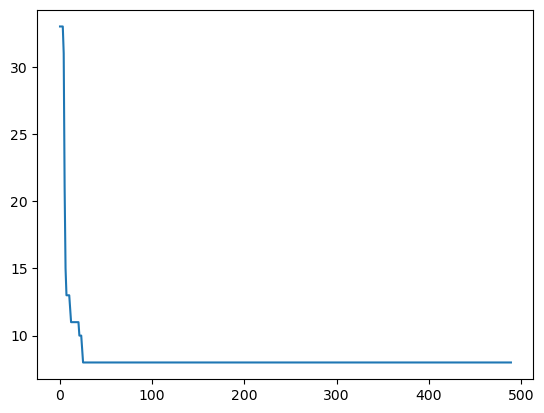

In [19]:
# plt.plot(val_loss_history)
# plt.show()

plt.plot(feature_sparsity_history)
# plt.ylim([0,2000])
plt.show()

# SkinnyTrees Averages for Best Hyperparameters

In [9]:
data = 'arcene'
annealing = [True]
criteria = 'auc'
tuning_seeds = [0,1,2,3,4,5,6,7,8,9]
version = 100

for anneal in annealing:
    print("======== Anneal:{}".format(anneal))

    df = pd.DataFrame()
    for tuning_seed in tuning_seeds:
        path = "/home/gridsan/shibal/SkinnyTrees/scripts/logs_trees/skinny_trees/publicdata/{}/cross-entropy/{}.{}/study".format(data, version, tuning_seed)
        if anneal:
            path = path+"-anneal"
#         path = path+"-seed8.csv"
        try:
            df_temp = pd.read_csv(path+"-seed8.csv")
        except:
            print("Missing:", path+"-seed8.csv")
            continue
        df = pd.concat([df,df_temp],axis=0)
        df.index = np.arange(len(df))
    print("Number of total trials:", df.shape[0])
    print("Max number of features:", max_features[data])
    df_study = df.copy()
    print("Number of trials satisfying the feature sparsity budget:", df.shape[0])
    df_opt = df.sort_values(by='user_attrs_feature_sparsity')
#     display(df_opt.T)
    if criteria=='auc':
        print("valid_auc:", df_opt.user_attrs_auc_valid.mean())
        print("test_auc:", df_opt.user_attrs_auc_test.mean())
        print("test_aucs:", df_opt.user_attrs_auc_test.values)
        print("test_aucs (SE):", df_opt.user_attrs_auc_test.sem())
    elif criteria=='accuracy':
        print("valid_accuracy:", df_opt.user_attrs_accuracy_valid.mean())
        print("test_accuracy:", df_opt.user_attrs_accuracy_test.mean())
        print("test_accuracies:", df_opt.user_attrs_accuracy_test.values)
    print("sparsity:", df_opt.user_attrs_feature_sparsity.values)
    print("Mean sparsity:", df_opt.user_attrs_approximate_feature_sparsity.mean())
    print("Standard Error sparsity:", df_opt.user_attrs_approximate_feature_sparsity.std()/np.sqrt(100))

======== Anneal:True
Number of total trials: 100
Max number of features: 10000
Number of trials satisfying the feature sparsity budget: 100
valid_auc: 0.8718181818181816
test_auc: 0.7219886363636364
test_aucs: [0.70251623 0.75202922 0.72077922 0.72118506 0.69926948 0.7325487
 0.72483766 0.74269481 0.70576299 0.72727273 0.71753247 0.75527597
 0.72362013 0.72767857 0.71469156 0.73295455 0.7049513  0.70008117
 0.76136364 0.72808442 0.72280844 0.73051948 0.74756494 0.70982143
 0.71996753 0.75974026 0.68871753 0.68668831 0.71387987 0.69926948
 0.73660714 0.74756494 0.69642857 0.73295455 0.69358766 0.66314935
 0.75162338 0.68912338 0.68668831 0.66233766 0.73011364 0.72362013
 0.7012987  0.71185065 0.70779221 0.70819805 0.7012987  0.70251623
 0.75121753 0.70332792 0.72646104 0.7224026  0.73336039 0.71834416
 0.73782468 0.76663961 0.7086039  0.78043831 0.71875    0.7325487
 0.68547078 0.74107143 0.69683442 0.7150974  0.67532468 0.74675325
 0.71266234 0.71753247 0.74512987 0.71144481 0.75689935